# Sopas notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def verificar_resultado(expected, calculated, title):
    # Verifica si {expected} es igual a {calculated} con unna tolerancia de 1e-2 (dos decimales)
    tolerance = 1e-2
    title=title.ljust(35)
    if np.abs(expected-calculated)>tolerance:
        print(f"- {title}: error (esperaba {expected}, obtuve {calculated:.2f})")
    else:
        print(f"+ {title}: bien  (esperaba {expected}, obtuve {calculated:.2f}).")

In [4]:
def calcular(df):

    ###### 1) Calcular el valor promedio del atributo GRASA ######
    # COMPLETAR
    promedio_grasa = df['GRASA'].mean()
    ###### FIN COMPLETAR ######

    ######  2) Contar la cantidad sopas del tipo "CC" ######
    # COMPLETAR
    #To avoid: count() because it returns the number of non-NA/null observations over requested axis
    cant_tipo_cc = df.loc[lambda df: df.TIPO == 'CC'].shape[0]
    #cant_tipo_cc = len(df.loc[lambda df: df.TIPO == 'CC'])
    
    ###### FIN COMPLETAR ######

    ######  3) Encontrar la sopa con más sodio (y el valor) ######

    # COMPLETAR
    max_sodio = df.SODIO.max()
    max_sodio_indice = df.SODIO.idxmax()

    #Implementacion 1
    
    ###### FIN COMPLETAR ######

    return promedio_grasa, cant_tipo_cc, max_sodio, max_sodio_indice

In [5]:
dataframe = pd.read_excel('Sopas.xls')

In [6]:
filas,columnas=dataframe.shape
print(f"El conjunto de datos tiene:\n\t {filas} filas o ejemplos\n\t {columnas} columnas o atributos")
print("Las columnas son: ", list(dataframe.columns))
print("\n")

El conjunto de datos tiene:
	 47 filas o ejemplos
	 8 columnas o atributos
Las columnas son:  ['MARCA', 'PRODUCTO', 'TIPO', 'COSTO', 'CALORÍAS', 'GRASA', 'CALORÍAS DE GRASA', 'SODIO']




In [7]:
promedio_grasa, cant_tipo_cc, max_sodio, max_sodio_indice = calcular(dataframe)
print("=== Resultado de los cálculos: ===")
verificar_resultado(2.4, promedio_grasa, "promedio_grasa")
verificar_resultado(15, cant_tipo_cc, "cant_tipo_cc")
verificar_resultado(970, max_sodio, "max_sodio")
verificar_resultado(6, max_sodio_indice, "max_sodio_indice")

=== Resultado de los cálculos: ===
+ promedio_grasa                     : bien  (esperaba 2.4, obtuve 2.40).
+ cant_tipo_cc                       : bien  (esperaba 15, obtuve 15.00).
+ max_sodio                          : bien  (esperaba 970, obtuve 970.00).
+ max_sodio_indice                   : bien  (esperaba 6, obtuve 6.00).


____
## Iris
4- El archivo “iris.csv” contiene información de 3 especies de flores.   
a. Utilice la librería Pandas para abrir el archivo.   
b. Haga un gráfico tipo “scatter_matrix” para visualizar todos los pares de variables.   
c. Realice un histograma de todas las variables (dataFrame.hist()).   


In [8]:
df_iris = pd.read_csv('iris.csv')

In [9]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'name'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3964351be0>,
      dtype=object)

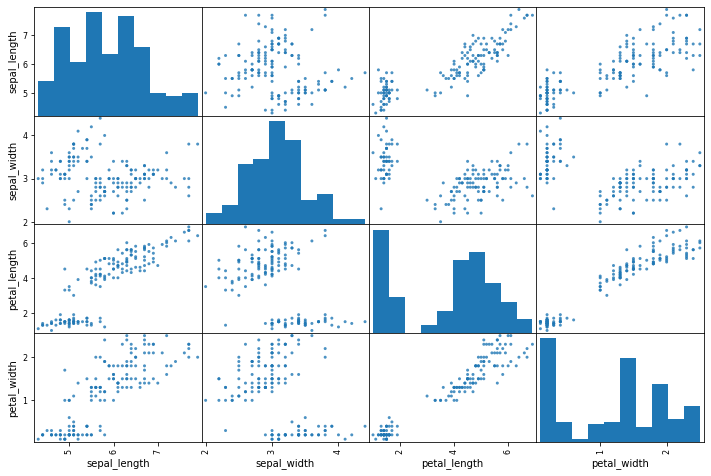

In [10]:
#Draw a matrix of scatter plots.
# diagonal : {‘hist’, ‘kde’}
# pick between ‘kde’ and ‘hist’ for either Kernel Density Estimation or Histogram plot in the diagonal
pd.plotting.scatter_matrix(df_iris, figsize=(12,8), alpha=0.8)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3961c096a0>,
      dtype=object)

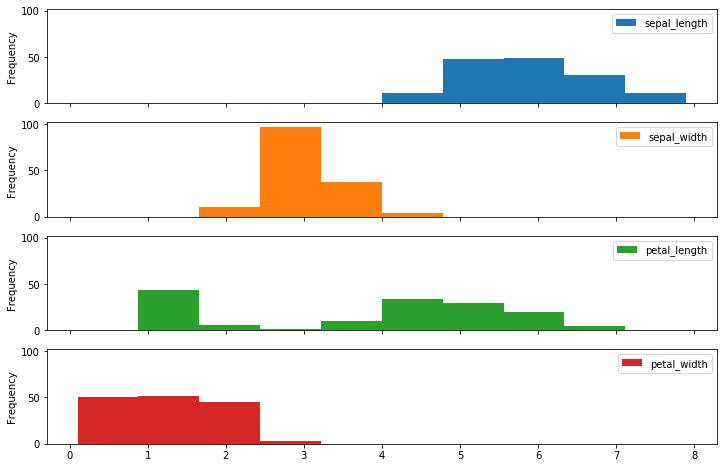

In [11]:
df_iris.plot.hist(subplots=True, figsize=(12,8), sharey=True)

_________
5.Realice el mismo procedimiento que para el ejercicio 4 pero con el dataset “Sopas.xls”. 

In [12]:
df_sopas = dataframe

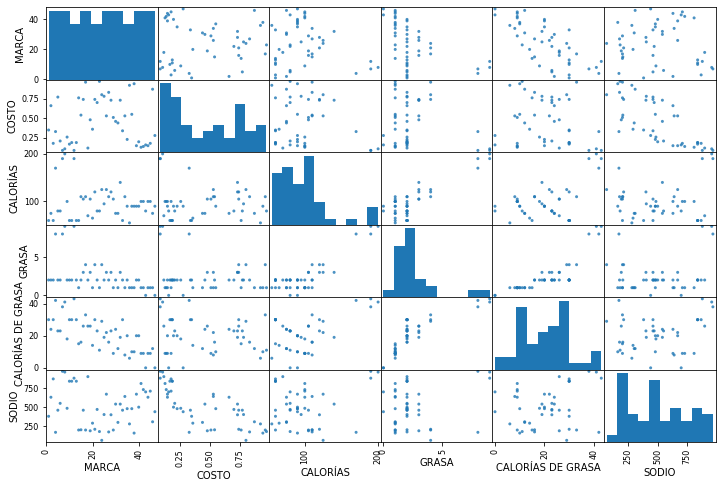

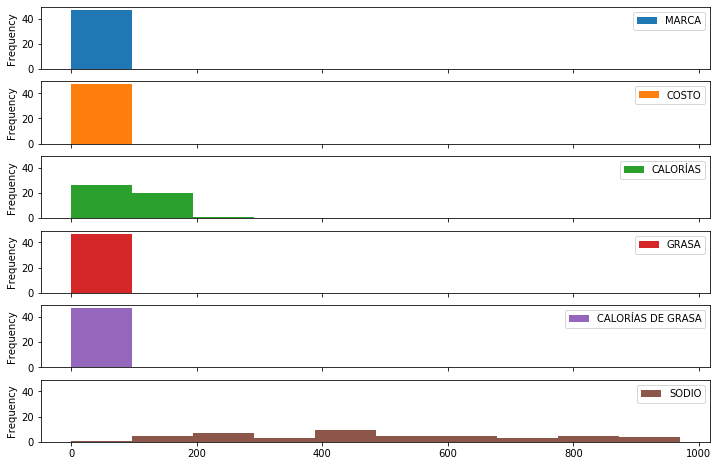

In [13]:
def repetir_graficos(df):
    pd.plotting.scatter_matrix(df, figsize=(12,8), alpha=0.8)
    df.plot.hist(subplots=True, figsize=(12,8), sharey=True)

repetir_graficos(df_sopas)

_______
6- Para el dataset “iris.csv” normalice cada variable (feature) con “min-max” y con “z-score”.
Grafique con histogramas para verificar los resultados. 

In [14]:
# df_iris.hist(figsize=(12,10))

In [15]:
# calcular min-max scaler
df_iris_max = df_iris.max()[0:4]
df_iris_min = df_iris.min()[0:4]

df_min_max = (df_iris.loc[:,'sepal_length':'petal_width'] - df_iris_min) / (df_iris_max + df_iris_min)

# df_min_max.hist(figsize=(12,10))
# (x-mean(x)) / std(x)

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df_min_max_sklearn = MinMaxScaler().fit_transform(df_iris.iloc[:,0:4])
df_min_max_sklearn = pd.DataFrame(df_min_max_sklearn, columns=df_min_max.columns.values)

In [17]:
# calcular zscore
df_iris_mean = df_iris.mean()[0:4]
df_iris_std = df_iris.std()[0:4]

df_z_score = (df_iris.loc[:,'sepal_length':'petal_width'] - df_iris_mean) / df_iris_std

# df_z_score.hist(figsize=(12,10))
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [18]:
#calculo ambos, primero 

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

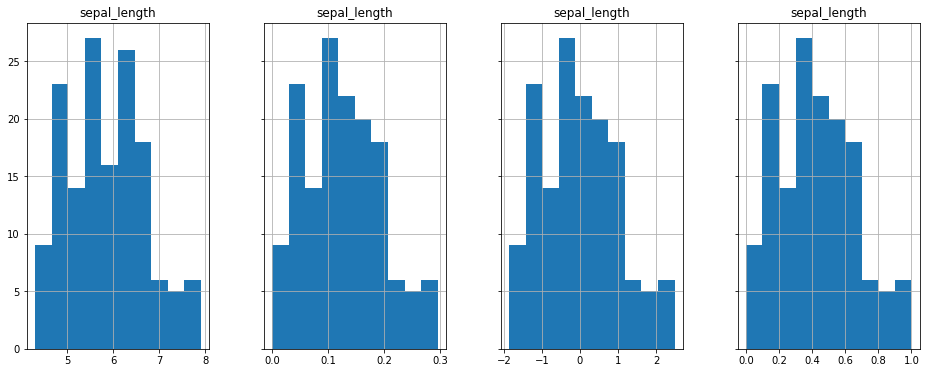

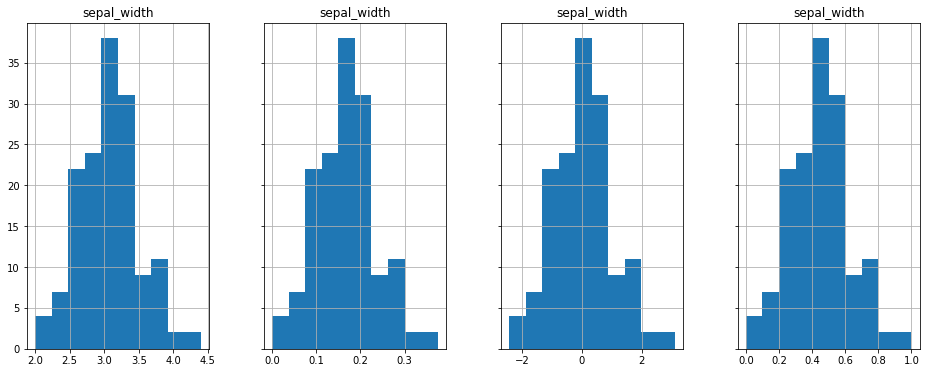

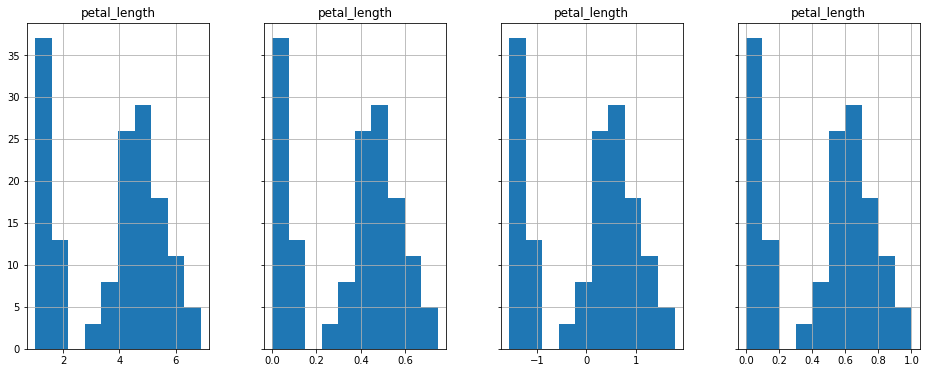

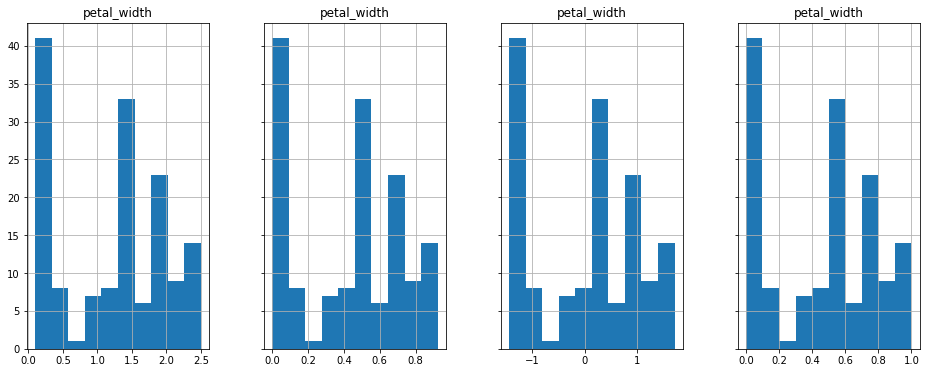

In [21]:
def plot_hist_by_columns(column, *dfs):
    fig, axes = plt.subplots(1,
                             len(dfs),
                             sharey=True,
                            # sharex=True,
                             figsize=(16,6))
    for i, df in zip(range(len(dfs)), dfs):
        df.loc[:,[column]].hist(ax=axes[i])
    return column

[ plot_hist_by_columns(column, df_iris, df_min_max, df_z_score, df_min_max_sklearn) for column in df_iris.columns[0:4] ]